In [2]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
# preprocessing the dataset to prepairing to compile and train
x_train = (x_train).astype(np.float32) / 255
x_test = (x_test).astype(np.float32) / 255

In [ ]:
# define basic model model  and show summary method to check layers
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 10)                737290    
                                                                 
Total params: 1183626 (4.52 MB)
Trainable params: 118362

In [ ]:
# compile model to prepairing to next step to start train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/15
500/500 [==============================] - 23s 36ms/step - loss: 1.4829 - accuracy: 0.4688 - val_loss: 1.1899 - val_accuracy: 0.5760
Epoch 2/15
500/500 [==============================] - 18s 36ms/step - loss: 1.0699 - accuracy: 0.6286 - val_loss: 0.9801 - val_accuracy: 0.6584
Epoch 3/15
500/500 [==============================] - 18s 36ms/step - loss: 0.8541 - accuracy: 0.7027 - val_loss: 0.8951 - val_accuracy: 0.6929
Epoch 4/15
500/500 [==============================] - 19s 37ms/step - loss: 0.6987 - accuracy: 0.7603 - val_loss: 0.9448 - val_accuracy: 0.6781
Epoch 5/15
500/500 [==============================] - 18s 36ms/step - loss: 0.5363 - accuracy: 0.8148 - val_loss: 0.9777 - val_accuracy: 0.6882
Epoch 6/15
500/500 [==============================] - 18s 36ms/step - loss: 0.3845 - accuracy: 0.8658 - val_loss: 1.1595 - val_accuracy: 0.6705
Epoch 7/15
500/500 [==============================] - 21s 41ms/step - loss: 0.2480 - accuracy: 0.9132 - val_loss: 1.3333 - val_accuracy:

In [ ]:
# evaluate models with train and validation  loss & acuuracy rate in any layers
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

# append data accuracy and loss rate to lists
train_loss.append(history.history['loss'][-1])
valid_loss.append(history.history['val_loss'][-1])
train_acc.append(history.history['accuracy'][-1])
valid_acc.append(history.history['val_accuracy'][-1])

# print data from accuracy level in any layer compile
print('params = {}, train_acc = {:4f}, val_acc = {:4f}'.format(model.count_params(), train_acc[-1], valid_acc[-1]))


params = 1183626, train_acc = 0.979880, val_acc = 0.645400


313/313 [==============================] - 2s 6ms/step

 
 $$$$$******** ^_^ Accuracy Base Convulotion Model = 64.54 % ^_^ **********$$$$$
 

[[671  40  57  20  35  10  17  32  76  42]
 [ 19 837   5   5   2   2   8   9  12 101]
 [ 66   9 500  62 100  90  83  59  16  15]
 [ 29  17  93 383  89 215  66  70  17  21]
 [ 20  10 106  55 535  58  79 120   7  10]
 [ 19   6  41 157  58 586  29  75   5  24]
 [  8   9  78  61  49  42 720  15  11   7]
 [ 16   3  28  44  73  62  12 746   5  11]
 [ 90  56  22  14  19  15   7  16 720  41]
 [ 31 123   8  17   8  10   5  24  18 756]]
[[0.671 0.04  0.057 0.02  0.035 0.01  0.017 0.032 0.076 0.042]
 [0.019 0.837 0.005 0.005 0.002 0.002 0.008 0.009 0.012 0.101]
 [0.066 0.009 0.5   0.062 0.1   0.09  0.083 0.059 0.016 0.015]
 [0.029 0.017 0.093 0.383 0.089 0.215 0.066 0.07  0.017 0.021]
 [0.02  0.01  0.106 0.055 0.535 0.058 0.079 0.12  0.007 0.01 ]
 [0.019 0.006 0.041 0.157 0.058 0.586 0.029 0.075 0.005 0.024]
 [0.008 0.009 0.078 0.061 0.049 0.042 0.72  0.015

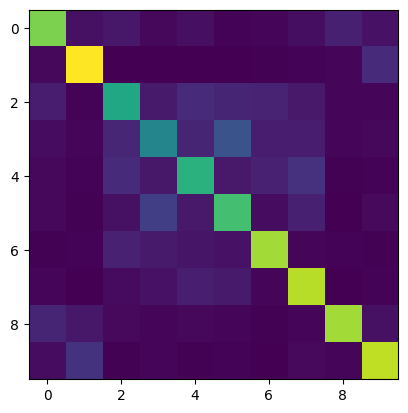

In [ ]:
#plot confusion matrix for base model
import sklearn.metrics

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print('\n \n $$$$$******** ^_^ Accuracy Base Convulotion Model = {} % ^_^ **********$$$$$\n \n'.format(100 * np.sum(y_pred == y_true) / len(y_true)))

conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

conf_norm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(conf_norm)


In [ ]:
# define model with stride
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
model.add(keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 128)       147584    
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                184330    
                                                                 
Total params: 630666 (2.41 MB)
Trainable params: 63066

In [ ]:
# compile model with stride to improve the accuracy model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/15
500/500 [==============================] - 19s 34ms/step - loss: 1.4858 - accuracy: 0.4656 - val_loss: 1.1914 - val_accuracy: 0.5761
Epoch 2/15
500/500 [==============================] - 17s 33ms/step - loss: 1.1047 - accuracy: 0.6148 - val_loss: 1.0002 - val_accuracy: 0.6494
Epoch 3/15
500/500 [==============================] - 18s 36ms/step - loss: 0.9063 - accuracy: 0.6838 - val_loss: 0.9111 - val_accuracy: 0.6851
Epoch 4/15
500/500 [==============================] - 16s 33ms/step - loss: 0.7739 - accuracy: 0.7333 - val_loss: 0.9066 - val_accuracy: 0.6877
Epoch 5/15
500/500 [==============================] - 16s 32ms/step - loss: 0.6700 - accuracy: 0.7690 - val_loss: 0.8766 - val_accuracy: 0.7074
Epoch 6/15
500/500 [==============================] - 19s 37ms/step - loss: 0.5764 - accuracy: 0.8009 - val_loss: 0.9025 - val_accuracy: 0.7094
Epoch 7/15
500/500 [==============================] - 17s 34ms/step - loss: 0.4862 - accuracy: 0.8311 - val_loss: 0.9144 - val_accuracy:

In [ ]:
# evaluate models with train and validation  loss & acuuracy rate in any layers
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

# append data accuracy and loss rate to lists
train_loss.append(history.history['loss'][-1])
valid_loss.append(history.history['val_loss'][-1])
train_acc.append(history.history['accuracy'][-1])
valid_acc.append(history.history['val_accuracy'][-1])

# print data from accuracy level in any layer compile
print('params = {}, train_acc = {:4f}, val_acc = {:4f}'.format(model.count_params(), train_acc[-1], valid_acc[-1]))


params = 630666, train_acc = 0.958260, val_acc = 0.680400


313/313 [==============================] - 1s 4ms/step

 
 $$$$$******** ^_^ Accuracy Base Convulotion Model with use Stride = 68.86 % ^_^ **********$$$$$
 

**********  We have better result of accuracy with use stride :) = 64.54 %   to-->  68.04 % **********
 
 
[[737  26  79  29  10   9  12  17  43  38]
 [ 28 829   8  15   1   6   3   5  19  86]
 [ 67   3 618 100  59  56  39  41   6  11]
 [ 26  16  89 574  46 131  57  43   8  10]
 [ 22   6 140 101 519  55  36 106   8   7]
 [ 15   4  72 210  24 578  20  65   4   8]
 [  9   5  81  98  27  33 730   8   3   6]
 [ 17   6  46  63  47  54   3 753   2   9]
 [ 83  46  24  22   7  12   6  12 755  33]
 [ 41  97  13  23   2   5   2  10  14 793]]
[[0.737 0.026 0.079 0.029 0.01  0.009 0.012 0.017 0.043 0.038]
 [0.028 0.829 0.008 0.015 0.001 0.006 0.003 0.005 0.019 0.086]
 [0.067 0.003 0.618 0.1   0.059 0.056 0.039 0.041 0.006 0.011]
 [0.026 0.016 0.089 0.574 0.046 0.131 0.057 0.043 0.008 0.01 ]
 [0.022 0.006 0.14  0.101 0.519 0.055 0.036 0.106 0.

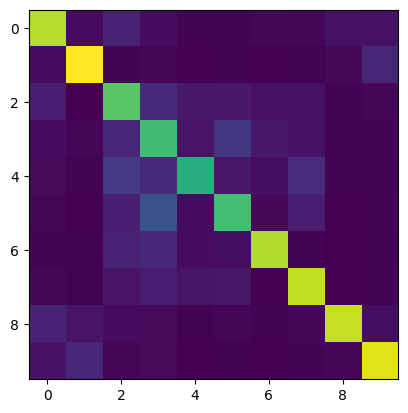

In [ ]:
#plot confusion matrix for base model with stride
import sklearn.metrics

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print('\n \n $$$$$******** ^_^ Accuracy Base Convulotion Model with use Stride = {} % ^_^ **********$$$$$\n \n'.format(100 * np.sum(y_pred == y_true) / len(y_true)))
print("**********  We have better result of accuracy with use stride :) = 64.54 %   to-->  {} % **********\n \n ".format(100 * np.sum(y_pred == y_true) / len(y_true)))

conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

conf_norm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(conf_norm)

In [42]:
# define base model with pooling
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=12,strides=4))
model.add(keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 conv2d_93 (Conv2D)          (None, 28, 28, 128)       147584    
                                                                 
 conv2d_94 (Conv2D)          (None, 26, 26, 128)       147584    
                                                                 
 conv2d_95 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 4, 4, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_22 (Flatten)        (None, 2048)              0         
                                                     

In [43]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/15
500/500 [==============================] - 20s 38ms/step - loss: 1.5855 - accuracy: 0.4221 - val_loss: 1.2609 - val_accuracy: 0.5436
Epoch 2/15
500/500 [==============================] - 19s 38ms/step - loss: 1.1059 - accuracy: 0.6120 - val_loss: 1.0225 - val_accuracy: 0.6498
Epoch 3/15
500/500 [==============================] - 18s 37ms/step - loss: 0.9326 - accuracy: 0.6748 - val_loss: 0.9212 - val_accuracy: 0.6837
Epoch 4/15
500/500 [==============================] - 18s 36ms/step - loss: 0.8422 - accuracy: 0.7083 - val_loss: 0.8675 - val_accuracy: 0.7012
Epoch 5/15
500/500 [==============================] - 18s 36ms/step - loss: 0.7708 - accuracy: 0.7341 - val_loss: 0.8424 - val_accuracy: 0.7120
Epoch 6/15
500/500 [==============================] - 19s 37ms/step - loss: 0.7163 - accuracy: 0.7542 - val_loss: 0.8325 - val_accuracy: 0.7196
Epoch 7/15
500/500 [==============================] - 18s 37ms/step - loss: 0.6709 - accuracy: 0.7681 - val_loss: 0.7798 - val_accuracy:

313/313 [==============================] - 1s 4ms/step

 
 $$$$$******** ^_^ Accuracy Base Convulotion Model with use Stride = 74.46 % ^_^ **********$$$$$
 

**********  We have better result of accuracy with use pooling :) = 68.04 %    to-->   74.46 %   **********
 
 
[[778  19  28   9  24   2  10  16  72  42]
 [ 16 859   2   3   1   1   4   5  21  88]
 [ 76   8 606  35 100  43  60  38  24  10]
 [ 35  10  75 479 104 114  75  53  27  28]
 [ 18   6  50  28 761  30  41  57   6   3]
 [ 15   4  42 114  66 639  25  70   7  18]
 [  8   3  41  38  57   7 815  11  11   9]
 [ 13   3  29  19  69  42   7 797   2  19]
 [ 72  22   7   8   8   3   6   8 828  38]
 [ 24  44   5   1   2   0   6   6  28 884]]
[[0.778 0.019 0.028 0.009 0.024 0.002 0.01  0.016 0.072 0.042]
 [0.016 0.859 0.002 0.003 0.001 0.001 0.004 0.005 0.021 0.088]
 [0.076 0.008 0.606 0.035 0.1   0.043 0.06  0.038 0.024 0.01 ]
 [0.035 0.01  0.075 0.479 0.104 0.114 0.075 0.053 0.027 0.028]
 [0.018 0.006 0.05  0.028 0.761 0.03  0.041 0.0

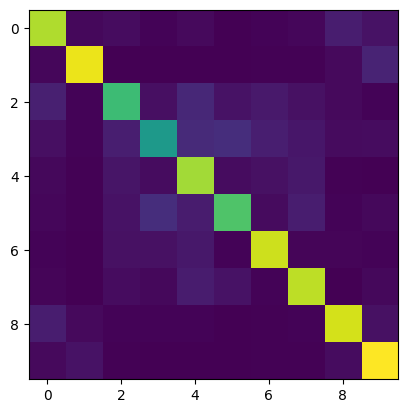

In [44]:
#plot confusion matrix for base model with pooling
import sklearn.metrics

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print('\n \n $$$$$******** ^_^ Accuracy Base Convulotion Model with use Stride = {} % ^_^ **********$$$$$\n \n'.format(100 * np.sum(y_pred == y_true) / len(y_true)))
print("**********  We have better result of accuracy with use pooling :) = 68.04 %    to-->   {} %   **********\n \n ".format(100 * np.sum(y_pred == y_true) / len(y_true)))

conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

conf_norm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(conf_norm)